# Funciones de correlación
Comenzamos importando las siguientes paqueterias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from collections import Counter
import random
import seaborn as sns

## Construcción de las circunferencias
Como queremos graficar puntos aleatorios de un círculo, primero debemos recordar como se grafica una circunferencia y recordemos que sólo queremos  elegir algunos puntos aleatorios de la circunferencia, y lo hacemos de la siguiente forma:

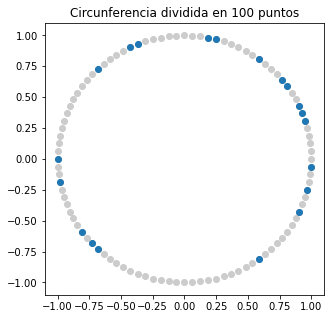

In [4]:
randProba = lambda a: a/sum(a)
npoints = 100# puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

#Graficamos circunferencia gris
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

#Graficamos puntos aleatorios de la circunferencia
n = 20 # puntos aleatorios que elegiremos del círculo
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
x = r * np.cos(t)
y = r * np.sin(t)
plt.title('Circunferencia dividida en 100 puntos')
plt.scatter(x, y)

### Le agregamos perturbaciones 

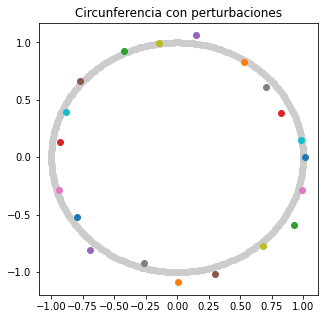

In [120]:
randProba = lambda a: a/sum(a)
npoints = 360 # puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False) 
x = (r * np.cos(t))
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

n = 20 # number of points to chose
puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False)]
for t in range(len(puntos)):
    R = r + random.uniform(-r*0.1,r*0.1)
    x = R * np.cos(t)
    y = R * np.sin(t)
    plt.title('Circunferencia con perturbaciones')
    plt.scatter(x, y)

## Puntos en diferentes círculos aleatorios
A continuación programamos una función a la cual le entregamos los siguientes datos: cantidad de circulos, puntos en los que dividiremos cada círculo, canidad de esos puntos que eligiremos de cada círculo, radio de los círculos, y rango de los centros. A partir de estos datos, nos entrega una 2 listas que son las coordenadas x, y las coordenadas y de cada punto que sigue la distribución de pertenecer a algún circulo con una perturbación del 10% del radio.

In [5]:
# Elegimos cajas cuadradas entre [0, R]
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos

def Puntos_circulos(ncentros, ncircle_points, radio, tcaja,p):
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    ran_centros = np.random.rand(ncentros, 2)*tcaja
    x_1, y_1 = ran_centros.T[0], ran_centros.T[1] 
    
    ran_pcircles = np.random.uniform(0, 2*np.pi, ncircle_points)
    pts = 0
    circulo = []
    for i in range(ncentros):
        cx = []
        cy = []
        for j in ran_pcircles:
            r = radio + random.uniform(-radio*p,radio*p) #Pertubación
            c_1 = x_1[i] + r*np.cos(j)
            c_2 = y_1[i] + r*np.sin(j)
            #Como los centros de los círculos pueden estar en la orilla, 
            #muchos puntos del cículo deseado se pueden salir de área a estudiar deseada, 
            #por lo que sólo guardamos los que quedan dentro
            if (0 < c_1 < tcaja) & (0 < c_2 < tcaja):
                cx.append(c_1)
                cy.append(c_2)
                pts+= 1
        # en caso de querer graficar un circulo en particular 
        circulo.append(list(zip(cx, cy)) )
    print('total puntos', pts)
    return circulo

In [6]:
circulo = Puntos_circulos(170, 20, 15, 100,0.01)

total puntos 2775


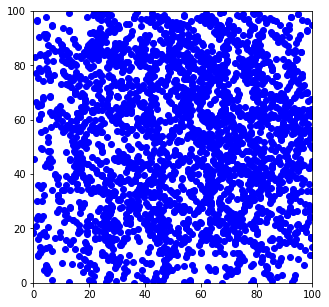

In [7]:
plt.figure(figsize=(5,5))
plt.xlim(0, 100)
plt.ylim(0, 100)

#graficar todos
for cir in circulo: 
    plt.scatter(*zip(*cir), color='b')

In [8]:
def DD(circulo):
    # Save them all in one array
    all_data = []
    for i, c in enumerate(circulo):
        for _, j in enumerate(c):
            all_data.append(j)
    return all_data

## Distribución aleatoria (RR)

In [9]:
rr = np.random.rand(int(len(DD(circulo))), 2)*100

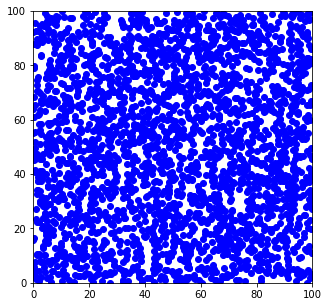

In [10]:
plt.figure(figsize=(5,5))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(rr.T[0], rr.T[1], color='b')

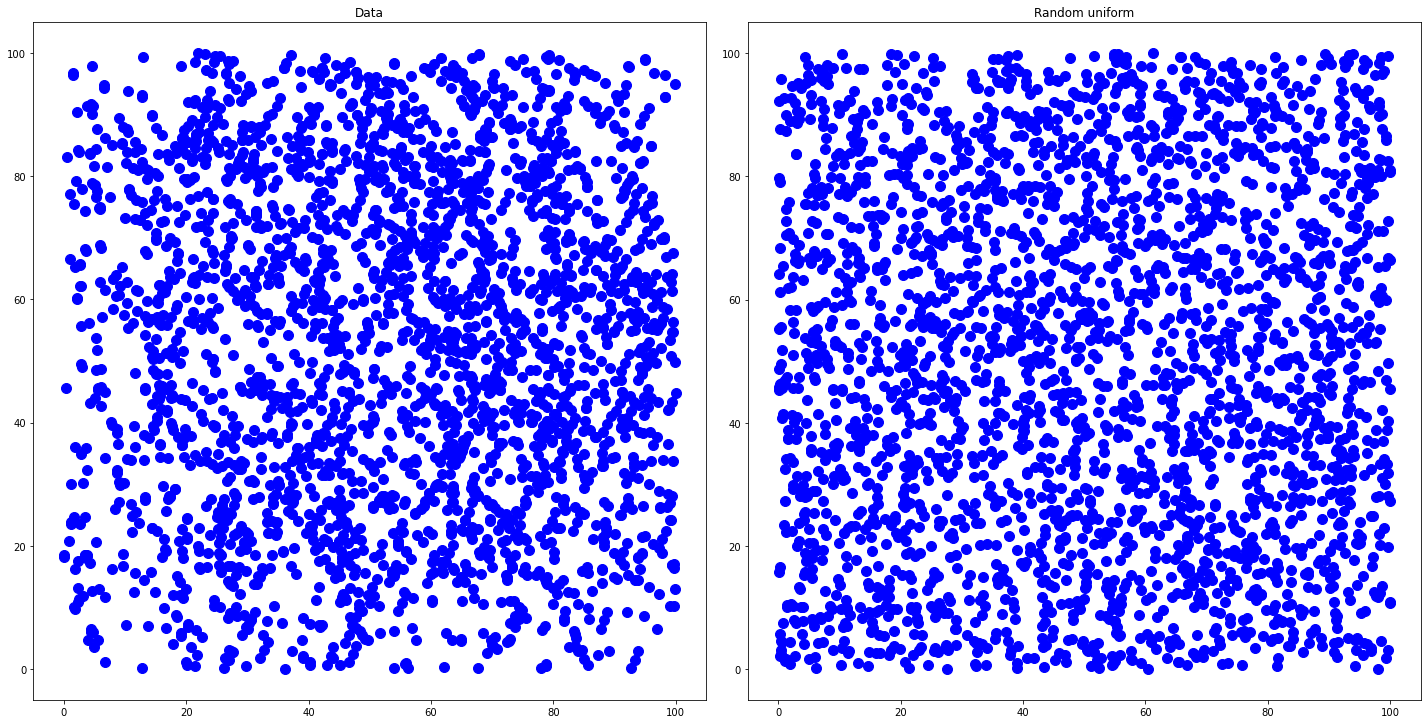

In [11]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('Data')
for cir in circulo: 
    axes_cosmo[0].scatter(*zip(*cir), color='b', s=100)

axes_cosmo[1].set_title('Random uniform')
axes_cosmo[1].scatter(rr.T[0], rr.T[1], color='b', s=100)

# Distancia
Para los siguientes calculos usamos la siguiente función para calcular distancias entre dos puntos:
$$d(\bar{x},\bar{y})=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [12]:
#Creamos una función que nos de las distancias entre dos puntos
def distancia(x1, x2):
    diff_x = (x1[0] - x2[0])**2
    diff_y = (x1[1] - x2[1])**2
    length = np.sqrt(diff_x+diff_y)
    return length

A continuación programamos una función que calcula las distancias entre todos los puntos, sin repetir.

In [13]:
def comp_all_distances(sample):
    dist_random = []
    for i, _ in enumerate(sample):
        g = partial(distancia, sample[i])
        d = list(map(g, sample[i+1:]))
        dist_random.extend(d)
    return dist_random

A continuación, calcullamos todas las ditancias de los puntos aleatorios y posteriormente de los DD

In [14]:
distance_rr = comp_all_distances(rr)

In [15]:
distance_dd = comp_all_distances(DD(circulo))

## Histogramas

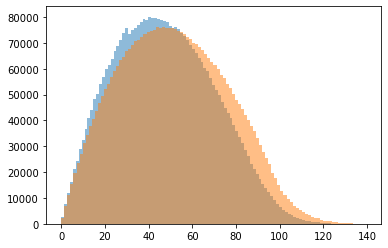

In [16]:
plt.figure()
plt.hist(distance_dd, bins=100, alpha=0.5)
plt.hist(distance_rr, bins=100, alpha=0.5)

plt.show()

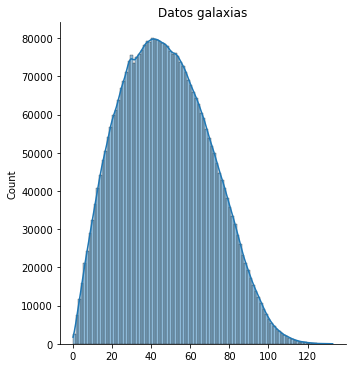

In [17]:
sns.displot(distance_dd, bins=100, kde=True).set(title='Datos galaxias');

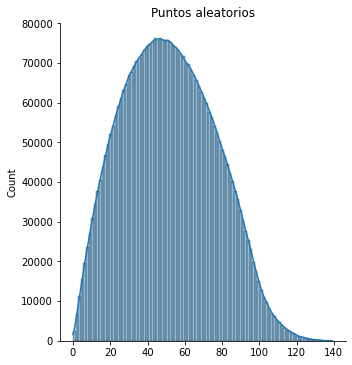

In [18]:
sns.displot(distance_rr, bins=100, kde=True).set(title='Puntos aleatorios');

In [19]:
sorted_DD = sorted(distance_dd)
sorted_RR= sorted(distance_rr)

Ahora, la forma más sencilla de estimar la función de correlación de dos puntos $\xi(r)$ :
$$\xi(r)=\frac{\hat{DD}}{\hat{RR}}-1 $$
donde DD es la distribución de distancias de pares de galaxias dentro de un conjunto de datos, y RR la distribución de distancias de un conjunto aleatorio. Si $\xi(r)=0$ la distribución de galaxias en los datos también es aleatoria; $\xi(r)>0$ existe una sobredensidad y, contrariamente, para $\xi(r)<0$ una infradensidad.

In [20]:
rrandom = [round(r, 0) for r in  distance_rr]
rcount = Counter(rrandom)
sorted_RR = sorted(rcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [21]:
ddata = [round(r, 0) for r in  distance_dd]
dcount = Counter(ddata )
sorted_DD = sorted(dcount.items())

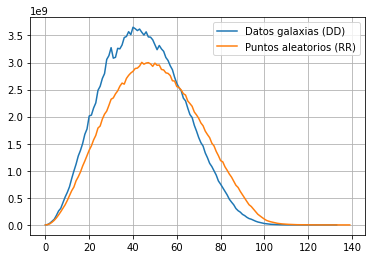

In [22]:
xDD = [x[0] for x in sorted_DD]
yDD = [x[1]**2 for x in sorted_DD]
xRR = [x[0] for x in sorted_RR]
yRR = [x[1]**2 for x in sorted_RR]
plt.plot(xDD, yDD, label='Datos galaxias (DD)')
plt.plot(xRR, yRR, label='Puntos aleatorios (RR)')
plt.grid()
plt.legend()

In [23]:
s = []
for i in range(140):
    s.append((dcount[i] - rcount[i]))

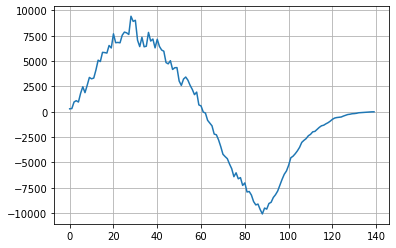

In [24]:
plt.plot(s)
plt.grid()

## Función de correlación

In [25]:
ξ_graf = []
for i in range(130):
    ξ_graf.append(abs(dcount[i]/rcount[i])-1)

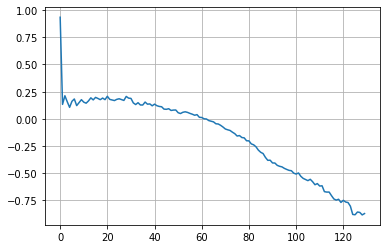

In [26]:
plt.plot(ξ_graf)
plt.grid()

## Extra: más puntos aleatorios

In [150]:
rrextra = np.random.rand(int(len(DD(circulo))*1.1), 2)*100
distance_rrextra = comp_all_distances(rrextra)
sorted_RRextra= sorted(distance_rrextra)
rrandomextra = [round(r, 0) for r in  distance_rrextra]
rcountextra = Counter(rrandomextra)
sorted_RRextra = sorted(rcountextra.items())

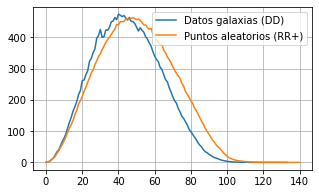

In [162]:
xDD2 = [x[0] for x in sorted_DD]
yDD2 = [(x[1]/len(DD(circulo)))**2 for x in sorted_DD]
xRRextra = [x[0] for x in sorted_RRextra]
yRRextra = [(x[1]/len(rrextra))**2 for x in sorted_RRextra]
plt.plot(xDD2, yDD2, label='Datos galaxias (DD)')
plt.plot(xRRextra, yRRextra, label='Puntos aleatorios (RR+)')
plt.grid()
plt.legend()

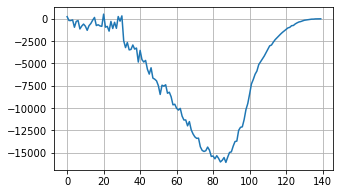

In [164]:
s2 = []
for i in range(140):
    s2.append((dcount[i] - rcountextra[i]))
plt.plot(s2)
plt.grid()

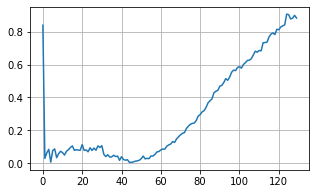

In [171]:
ξ_graf2 = []
for i in range(130):
    ξ_graf2.append(abs((dcount[i]/len(DD(circulo))/(rcountextra[i]/len(rrextra)))-1))
plt.plot(ξ_graf2)
plt.grid()

# Clustering
## DBSCAN
Density-Based Spatial Clustering of Applications with Noise

- Si no hay densidad, entonces es ruido

class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

"El algoritmo DBSCAN funciona con dos parámetros.

Estos parámetros son:

- Epsilon (Eps): Esta es la distancia mínima requerida para que dos puntos sean denominados como vecinos. Esta distancia se conoce como Epsilon (Eps). Por lo tanto, consideramos Eps como un umbral para considerar dos puntos como vecinos, es decir, si la distancia entre dos puntos es máxima Eps, entonces consideramos que los dos puntos son vecinos.

- MinPoints: Esto se refiere al número mínimo de puntos necesarios para construir un clúster. Consideramos MinPoints como un umbral para considerar un clúster como un clúster. Un clúster solo se reconoce si el número de puntos es mayor o igual que los MinPts.

Tipos de puntos de datos en un clúster de DBSCAN
Una vez que se completa la agrupación en clústeres de DBSCAN, terminamos con tres tipos de puntos de datos de la siguiente manera:

- Núcleo: Este es un punto a partir del cual los dos parámetros anteriores están completamente definidos, es decir, un punto con al menos Minpoints dentro de la distancia de Eps de sí mismo.
- Frontera: Este es cualquier punto de datos que no es un punto central, pero tiene al menos un punto central dentro de la distancia Eps de sí mismo.
- Ruido: Este es un punto con menos de Minpoints a distancia Eps de sí mismo. Por lo tanto, no es un núcleo o una frontera." -https://www.section.io/engineering-education/dbscan-clustering-in-python/#:~:text=DBSCAN%20is%20a%20popular%20density,number%20of%20clusters%20required%20prior.

In [31]:
from sklearn.cluster import DBSCAN

In [39]:
circulos = DD(circulo)

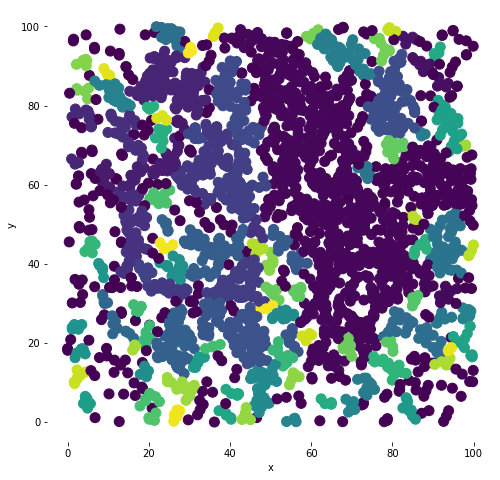

In [173]:
#Importampos los datos
datos = np.zeros((len(circulos),2))
for i in range(len(circulos)):
        datos[i,0] = circulos[i][0]
        datos[i,1] = circulos[i][1]

#identificar Clusters
clusters = DBSCAN(eps=2, min_samples=4).fit_predict(datos)


#Gráfica de matplotlib para mostrar los Clusters 
plt.figure(figsize=(8,8))
plt.scatter(datos[:,0], datos[:,1], c=clusters, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()

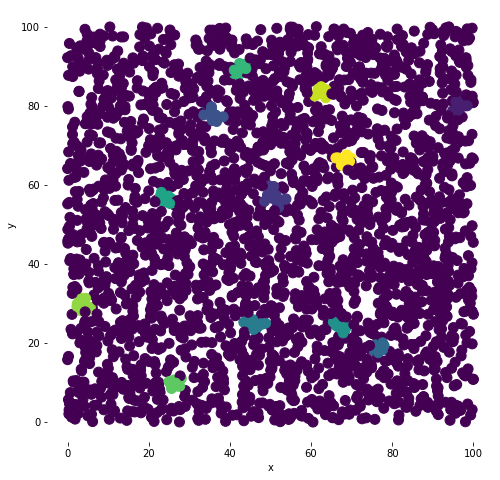

In [175]:
#Importampos los datos
datosrr = np.zeros((len(rr),2))
for i in range(len(rr)):
        datosrr[i,0] = rr[i][0]
        datosrr[i,1] = rr[i][1]

#identificar Clusters
clusters = DBSCAN(eps=2, min_samples=10).fit_predict(datosrr)

#Gráfica de matplotlib para mostrar los Clusters 
plt.figure(figsize=(8,8))
plt.scatter(datosrr[:,0], datosrr[:,1], c=clusters, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()

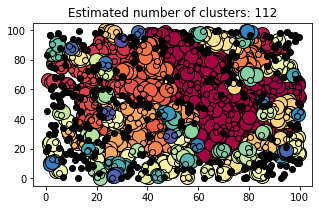

In [172]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=4).fit(datos)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

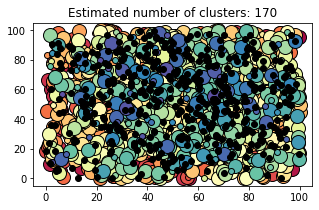

In [176]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=4).fit(datosrr)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Fuzzy c means

### from fcmeans import FCM
from sklearn.datasets import make_blobs
from seaborn import scatterplot as scatter

#fit the fuzzy-c-means
fcm = FCM(n_clusters=105)
fcm.fit(datos)

#Resultados
#Centroides 
fcm_centers = fcm.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcm_labels_max = fcm.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcm.u.shape)
print(fcm.u[0])
print(fcm_labels_max)

#Aquí la clase que menos se parecen
fcm_labels_min = fcm.u.argmin(axis=1)

In [142]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from seaborn import scatterplot as scatter

(2775, 100)
[2.04623423e-04 5.41727879e-05 3.27843735e-05 3.25619356e-04
 1.10949344e-04 5.87010817e-05 3.43912478e-05 4.16818769e-03
 1.45155838e-04 2.54678778e-04 4.54845495e-05 7.31275312e-05
 2.49919898e-05 7.85040368e-05 1.09052461e-04 3.83861209e-05
 3.30449498e-05 2.76037485e-05 1.03510117e-04 4.74099746e-05
 4.41065774e-04 1.83748462e-04 2.00968825e-05 3.21150891e-04
 3.16711235e-05 8.05950467e-05 2.51667257e-04 2.62454650e-05
 9.75829066e-05 4.13531581e-05 5.13616143e-05 2.69880228e-04
 8.52701088e-05 9.55796579e-05 1.70567128e-04 9.76900774e-05
 6.01302534e-05 7.26923198e-05 9.13164523e-05 1.06789788e-04
 5.81721569e-05 3.02530494e-05 6.07095120e-05 3.55874829e-05
 4.68530620e-05 4.15566173e-04 1.62270429e-03 3.62476428e-05
 3.92975241e-05 2.54039754e-05 4.04975823e-04 7.54353749e-05
 3.25478718e-05 1.88655694e-04 2.63108594e-04 2.53554312e-05
 5.20604681e-04 1.40857056e-04 2.20229221e-04 1.27336306e-04
 3.82075392e-04 3.16348154e-05 1.80571140e-04 9.47443390e-05
 2.65197254e

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anacond

<AxesSubplot:>

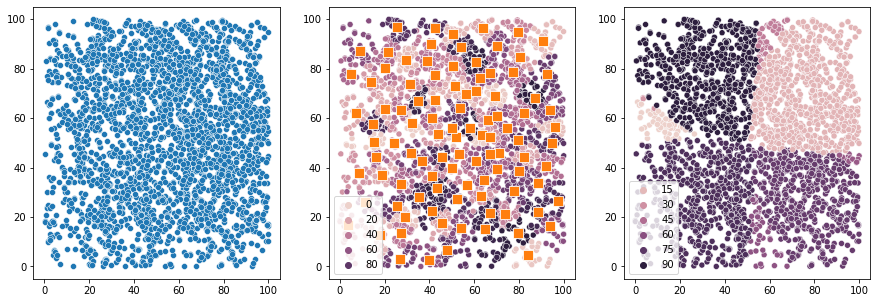

In [145]:
#fit the fuzzy-c-means
fcm = FCM(n_clusters=100)
fcm.fit(datos)

#Resultados
#Centroides 
fcm_centers = fcm.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcm_labels_max = fcm.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcm.u.shape)
print(fcm.u[0])
print(fcm_labels_max)

#Aquí la clase que menos se parecen
fcmr_labels_min = fcm.u.argmin(axis=1)

#Plot
f, axes = plt.subplots(1, 3, figsize=(15,5))
scatter(datos[:,0], datos[:,1], ax=axes[0])
scatter(datos[:,0], datos[:,1], ax=axes[1], hue=fcm_labels_max)
scatter(datos[:,0], datos[:,1], ax=axes[2], hue=fcm_labels_min)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1], marker="s", s=100)

(2775, 100)
[0.01162918 0.0010527  0.00240031 0.0013893  0.00223997 0.00285406
 0.00197341 0.00948699 0.00418029 0.01426916 0.00123287 0.00354198
 0.00164649 0.00157855 0.00364616 0.00134176 0.00156859 0.00518612
 0.01367698 0.01266118 0.00108174 0.00498713 0.03965814 0.00515599
 0.00815809 0.1245571  0.00302129 0.00464519 0.00288056 0.00099264
 0.00170048 0.00114297 0.06273227 0.00275366 0.00313023 0.00228967
 0.00233958 0.00096964 0.00423955 0.00105688 0.00579616 0.00188231
 0.00067307 0.00569204 0.01280431 0.01364558 0.00232517 0.00248468
 0.00242084 0.0016016  0.00368072 0.0011268  0.00174794 0.00193711
 0.0018765  0.00146525 0.00084191 0.01793569 0.01684644 0.00121515
 0.0014116  0.00297116 0.00087282 0.03882356 0.00297557 0.00078258
 0.00959687 0.00184909 0.00172003 0.00345566 0.00261124 0.00532337
 0.0237011  0.00392586 0.00430376 0.00527295 0.00345613 0.00697959
 0.02152567 0.00093854 0.072168   0.00559083 0.01376944 0.00830171
 0.0018262  0.12912789 0.00144463 0.0019662  0.001

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anacond

<AxesSubplot:>

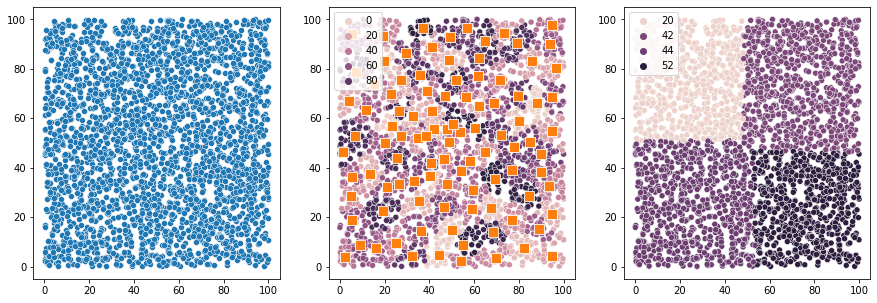

In [135]:
#fit the fuzzy-c-means
fcmr = FCM(n_clusters=100)
fcmr.fit(datosrr)

#Resultados
#Centroides 
fcmr_centers = fcmr.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcmr_labels_max = fcmr.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcmr.u.shape)
print(fcmr.u[0])
print(fcmr_labels_max)

#Aquí la clase que menos se parecen
fcmr_labels_min = fcmr.u.argmin(axis=1)

#Plot
f, axes = plt.subplots(1, 3, figsize=(15,5))
scatter(datosrr[:,0], datosrr[:,1], ax=axes[0])
scatter(datosrr[:,0], datosrr[:,1], ax=axes[1], hue=fcmr_labels_max)
scatter(datosrr[:,0], datosrr[:,1], ax=axes[2], hue=fcm_labels_min)
scatter(fcmr_centers[:,0], fcmr_centers[:,1], ax=axes[1], marker="s", s=100)